<a href="https://colab.research.google.com/github/vunky-himawan/PCVK/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

## Linear Brightness

formula: g(x,y) = f(x,y) + b

g(x, y) adalah nilai pixel setelah transformasi, f(x, y) adalah nilai pixel asli, b adalah nilai brightness

Mengubah tingkate kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


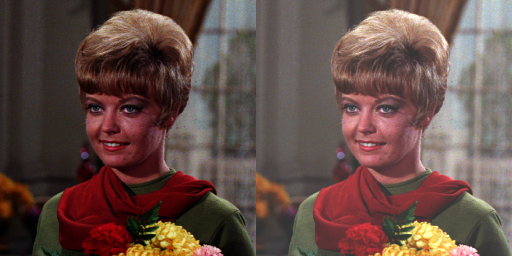

In [62]:
print('Mengubah tingkate kecerahan citra')
print('---------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Erro, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# cara simpel tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum

#### 1. Implementasi inverse citra

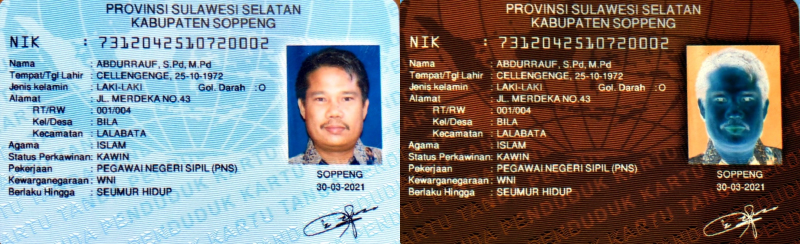

In [72]:
ktp_path = '/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg'

original = cv.imread(ktp_path)
original = cv.resize(original, (0, 0), fx=0.5, fy=0.5)
inverse_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      inverse_image[y, x, c] = np.clip(255 - original[y, x, c], 0, 255)

final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

#### 2. Implementasi tranformasi contrast

formula g(x,y) = a * f(x,y) + b

Mengubah kontras dan tingkat kecerahan citra
---------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontrast [1.0 - 3.0]: 2


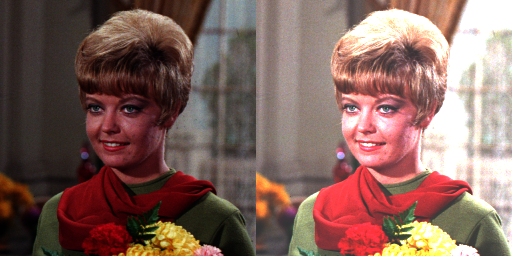

In [64]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------')

try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan kontrast [1.0 - 3.0]: '))
except ValueError:
  print('Erro, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

#### 3. Implementasi transformasi logaritmic brightness

formula: s = c * log(1 + r)

Mengubah tingkat kecerahan citra dengan Transformasi Log
---------------------------------
Masukkan nilai kecerahan: 50


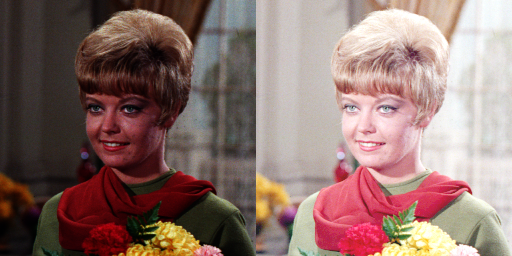

In [65]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('---------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Erro, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(brightness * np.log(1 + original[y, x, c]), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

#### 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

In [66]:
import matplotlib.pyplot as plt

a. Averaging

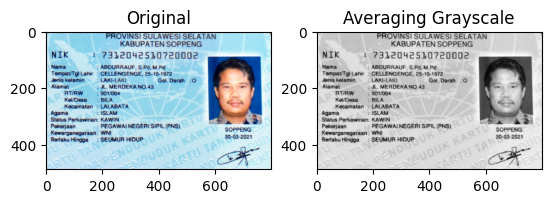

In [67]:
original = cv.imread(ktp_path)
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
grayscale_avg = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      red = original[y, x, 0]
      green = original[y, x, 1]
      blue = original[y, x, 2]
      grayscale_avg[y, x] = np.mean([red, green, blue])

# Gambar pertama
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, posisi 1
plt.imshow(original)
plt.title('Original')

# Gambar kedua
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, posisi 2
plt.imshow(grayscale_avg)
plt.title('Averaging Grayscale')

# Menampilkan gambar
plt.show()

b. Lightness

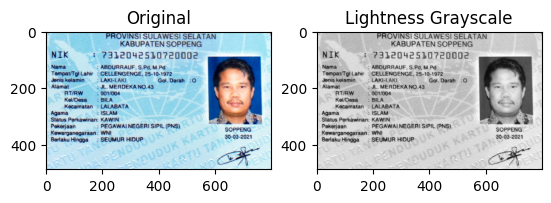

In [68]:
original = cv.imread(ktp_path)
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
grayscale_lightness = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      red = original[y, x, 0]
      green = original[y, x, 1]
      blue = original[y, x, 2]

      max_rgb = int(np.max([red, green, blue]))
      min_rgb = int(np.min([red, green, blue]))

      grayscale_lightness[y, x] = (max_rgb + min_rgb) / 2

# Gambar pertama
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, posisi 1
plt.imshow(original)
plt.title('Original')

# Gambar kedua
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, posisi 2
plt.imshow(grayscale_lightness)
plt.title('Lightness Grayscale')

# Menampilkan gambar
plt.show()

c. Luminance

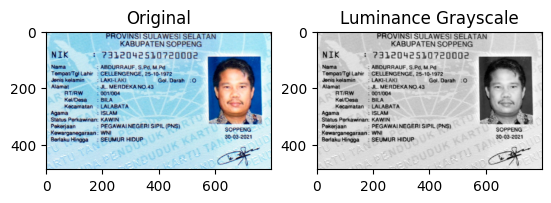

In [69]:
original = cv.imread(ktp_path)
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
grayscale_luminance = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      red = original[y, x, 0]
      green = original[y, x, 1]
      blue = original[y, x, 2]

      calc_red = int(0.21 * red)
      calc_green = int(0.72 * green)
      calc_blue = int(0.07 * blue)

      grayscale_luminance[y, x] = calc_red + calc_green + calc_blue

# Gambar pertama
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, posisi 1
plt.imshow(original)
plt.title('Original')

# Gambar kedua
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, posisi 2
plt.imshow(grayscale_luminance)
plt.title('Luminance Grayscale')

# Menampilkan gambar
plt.show()

#### 5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

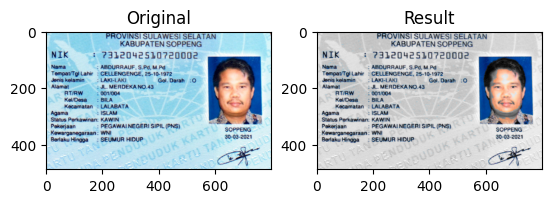

In [70]:
original = cv.imread(ktp_path)
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
grayscale_image = np.zeros(original.shape, original.dtype)
result = np.zeros(original.shape, original.dtype)

# rentang warna yang akan diseleksi
lower_blue_rgb = np.array([0, 0, 100])
upper_blue_rgb = np.array([255, 255, 200])

# menghasilkan mask biner yang menandai piksel dalam rentang warna lower_blue_rgb dan upper_blur_rgb.
# akan menghasilkan warna putih apabila masuk dalam rentang dan akan berwarna hitam jika tidak
mask = cv.inRange(original, lower_blue_rgb, upper_blue_rgb)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      red = original[y, x, 0]
      green = original[y, x, 1]
      blue = original[y, x, 2]

      calc_red = int(0.21 * red)
      calc_green = int(0.72 * green)
      calc_blue = int(0.07 * blue)

      grayscale_image[y, x] = calc_red + calc_green + calc_blue

# Mengganti piksel yang tidak termasuk dalam rentang warna biru (mask == 0)
# dengan gambar grayscale, sementara piksel biru tetap sama.
result = np.where(mask[:, :, None] == 0, grayscale_image, original)

# Gambar pertama
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, posisi 1
plt.imshow(original)
plt.title('Original')

# Gambar kedua
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, posisi 2
plt.imshow(result)
plt.title('Result')

# Menampilkan gambar
plt.show()

# Challenge Mandrill

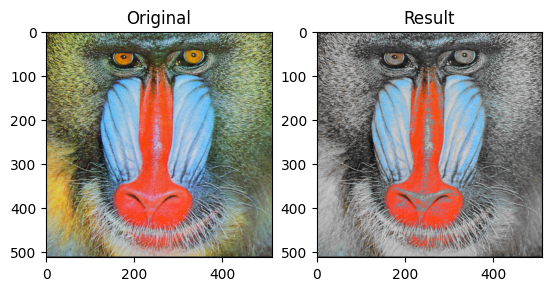

In [71]:
mandrill_image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/mandrill.tiff')
mandrill_image = cv.cvtColor(mandrill_image, cv.COLOR_BGR2RGB)
grayscale_image = np.zeros(mandrill_image.shape, mandrill_image.dtype)
result = np.zeros(mandrill_image.shape, mandrill_image.dtype)

# rentang warna merah
low_red = np.array([100, 0, 0])
upp_red = np.array([255, 100, 100])

# rentang warna biru
low_blue = np.array([100, 150, 150])
upp_blue = np.array([150, 255, 255])

mask_red = cv.inRange(mandrill_image, low_red, upp_red)
mask_blue = cv.inRange(mandrill_image, low_blue, upp_blue)

for y in range(mandrill_image.shape[0]):
    for x in range(mandrill_image.shape[1]):
      red = mandrill_image[y, x, 0]
      green = mandrill_image[y, x, 1]
      blue = mandrill_image[y, x, 2]

      calc_red = int(0.21 * red)
      calc_green = int(0.72 * green)
      calc_blue = int(0.07 * blue)

      grayscale_image[y, x] = calc_red + calc_green + calc_blue

# Mengganti piksel yang tidak termasuk dalam rentang warna merah (mask_red == 0)
# dengan gambar grayscale, sementara piksel merah tetap sama.
result = np.where(mask_red[:, :, None] == 0, grayscale_image, mandrill_image)

# Mengganti piksel yang tidak termasuk dalam rentang warna biru (mask_blue == 0)
# dengan gambar grayscale, sementara piksel biru tetap sama.
result = np.where(mask_blue[:, :, None] == 255, mandrill_image, result)

# Gambar pertama
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, posisi 1
plt.imshow(mandrill_image)
plt.title('Original')

# Gambar kedua
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, posisi 2
plt.imshow(result)
plt.title('Result')

# Menampilkan gambar
plt.show()